In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/Users/FranciscoDelgado/Desktop/fd miscel/paraportfolio/books.csv', error_bad_lines = False)

C:\Users\FranciscoDelgado\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [ ]:
DATA EXPLORATION

In [3]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
data.columns = data.columns.str.strip()  # the column num_pages has spaces before. Let´s fix it

In [6]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [7]:
len(data)

11123

In [8]:
data.duplicated().any()

False

In [17]:
# there is no duplicated data. 

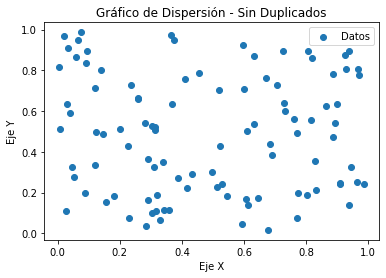

In [9]:

np.random.seed(42)
data = np.random.rand(100, 2)

# Crear un gráfico de dispersión
plt.scatter(data[:, 0], data[:, 1], label='Datos')

# Añadir etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Dispersión - Sin Duplicados')

# Mostrar leyenda y el gráfico
plt.legend()
plt.show()

In [ ]:
# there is no duplicated or missing values

In [10]:
data = pd.read_csv('C:/Users/FranciscoDelgado/Desktop/fd miscel/paraportfolio/books.csv', error_bad_lines = False)

C:\Users\FranciscoDelgado\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [11]:
print(data['average_rating'].dtype)

float64


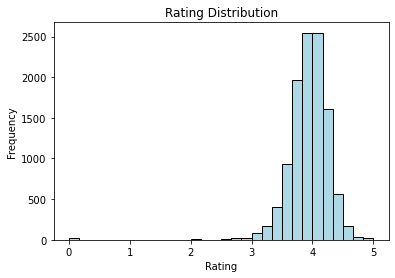

In [12]:
plt.hist(data['average_rating'], bins=30, edgecolor='black', color='lightblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

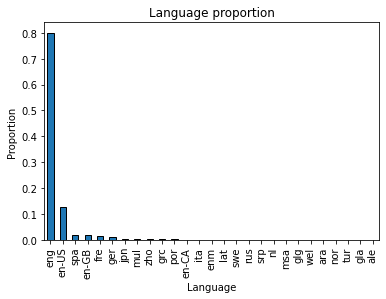

In [131]:
languages = data['language_code'].value_counts(normalize=True)

languages.plot(kind='bar', edgecolor='black')
plt.title('Language proportion')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.show()

In [14]:
# Obtener los diferentes idiomas en la columna 'language_code'
distinct_languages = data['language_code'].unique()

# Mostrar los idiomas
print("Distinct Langs:")
print(distinct_languages)

Distinct Langs:
['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']


In [30]:
# we can observe that there is 4 "types" of english (eng, eng-US, eng-GB, eng-CA). Let´s group them in one.

In [15]:
data['lang_grouped'] = data['language_code'].replace({'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'})

In [16]:
distinct_languages = data['lang_grouped'].unique()
print("Distinct Langs:")
print(distinct_languages)

Distinct Langs:
['eng' 'fre' 'spa' 'mul' 'grc' 'enm' 'ger' 'jpn' 'ara' 'nl' 'zho' 'lat'
 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor' 'tur' 'gla' 'ale']


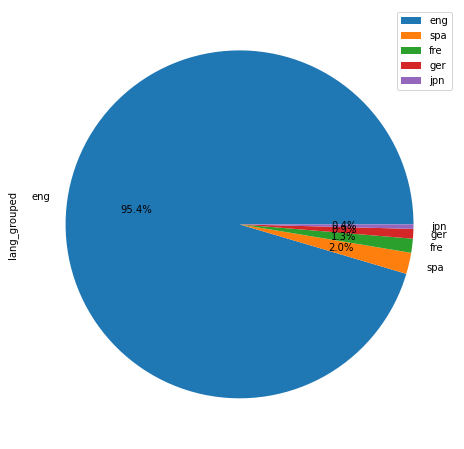

In [17]:
# top 5 languages
data['lang_grouped'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
# we can see that only the 4.6% of books in this list are written in different language then english. 

Titles by author (Top 15):
Stephen King                   40
P.G. Wodehouse                 40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
Piers Anthony                  30
Sandra Brown                   29
Mercedes Lackey                29
Dick Francis                   28
Terry Pratchett                23
James Patterson                23
Laurell K. Hamilton            23
Margaret Weis/Tracy Hickman    23
Gordon Korman                  22
Bill Bryson                    21
Name: authors, dtype: int64


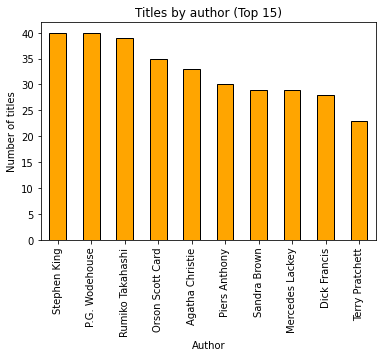

In [111]:
# Titles by author
titles_by_author = data['authors'].value_counts()

# Mostrar los 10 autores principales y sus conteos
print("Titles by author (Top 15):")
print(titles_by_author.head(15))

# Graficar el conteo de libros por autor (Top 10)
titles_by_author.head(10).plot(kind='bar', edgecolor='black', color='orange')
plt.title('Titles by author (Top 15)')
plt.xlabel('Author')
plt.ylabel('Number of titles')
plt.show()

In [ ]:
# above, we can observe that there are 5 authors appearing with more than 30 titles on this list.

In [113]:
authors_with_one_title = data['authors'].value_counts()
authors_with_one_title = authors_with_one_title[authors_with_one_title == 1]

# Count of authors with exactly 1 title
num_authors_with_one_title = len(authors_with_one_title)

print(f"Number of authors with exactly 1 title: {num_authors_with_one_title}")


Number of authors with exactly 1 title: 5278


In [ ]:
# and in the other hang we can see taht there are more than 5200 authors appearing with just one title.

By Editor (Top 15):
Vintage               318
Penguin Books         261
Penguin Classics      184
Mariner Books         150
Ballantine Books      144
Harper Perennial      112
HarperCollins         112
Pocket Books          111
Bantam                110
VIZ Media LLC          88
Berkley                86
Dover Publications     85
Modern Library         82
Del Rey                80
Tor Books              76
Name: publisher, dtype: int64


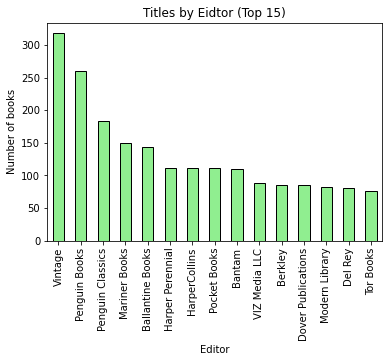

In [21]:
titles_by_editor = data['publisher'].value_counts()

print("By Editor (Top 15):")
print(titles_by_editor.head(15))

# Number of books by editor (Top 15)
titles_by_editor.head(15).plot(kind='bar', edgecolor='black', color='lightgreen')
plt.title('Titles by Eidtor (Top 15)')
plt.xlabel('Editor')
plt.ylabel('Number of books')
plt.show()

In [ ]:
# Vintage and Penguin Editors are ahead, Penguin appear splited in two, that add up to 445 books edited by them. 

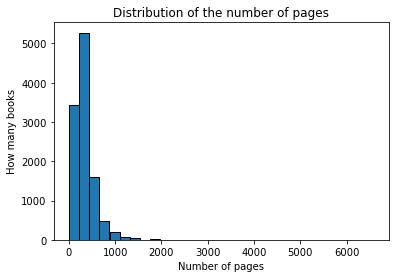

In [114]:
# Crear un histograma para la distribución del número de páginas
plt.hist(data['num_pages'], bins=30, edgecolor='black')
plt.title('Distribution of the number of pages')
plt.xlabel('Number of pages')
plt.ylabel('How many books')
plt.show()

In [24]:
data.rename(columns={'  num_pages': 'num_pages'}, inplace=True)  # the 'num_pages' has been renamed (with no spaces before it)

In [26]:
print(data.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'lang_grouped'],
      dtype='object')


In [115]:
# Estadísticas descriptivas del número de páginas
media_paginas = data['num_pages'].mean()
mediana_paginas = data['num_pages'].median()
desviacion_estandar_paginas = data['num_pages'].std()

print(f'Mean of pagaes: {media_paginas:.2f}')
print(f'Median of pages: {mediana_paginas}')
print(f'DStandard deviation: {desviacion_estandar_paginas:.2f}')

Mean of pagaes: 336.41
Median of pages: 299.0
DStandard deviation: 241.15


In [ ]:
# we can see that the mean number of pages is around 340. That amount of number of pages is chosen by most people.

In [28]:
# Create a matrix correlation
matrix_corr = data.corr()

# Mostrar la matriz de correlación
print("Matrix Corr:")
print(matrix_corr)

Matrix Corr:
                      bookID  average_rating    isbn13  num_pages  \
bookID              1.000000       -0.036207 -0.002185  -0.026134   
average_rating     -0.036207        1.000000 -0.001965   0.150477   
isbn13             -0.002185       -0.001965  1.000000  -0.009818   
num_pages          -0.026134        0.150477 -0.009818   1.000000   
ratings_count      -0.076820        0.038224  0.005494   0.034337   
text_reviews_count -0.081289        0.033663  0.008152   0.036977   

                    ratings_count  text_reviews_count  
bookID                  -0.076820           -0.081289  
average_rating           0.038224            0.033663  
isbn13                   0.005494            0.008152  
num_pages                0.034337            0.036977  
ratings_count            1.000000            0.865977  
text_reviews_count       0.865977            1.000000  


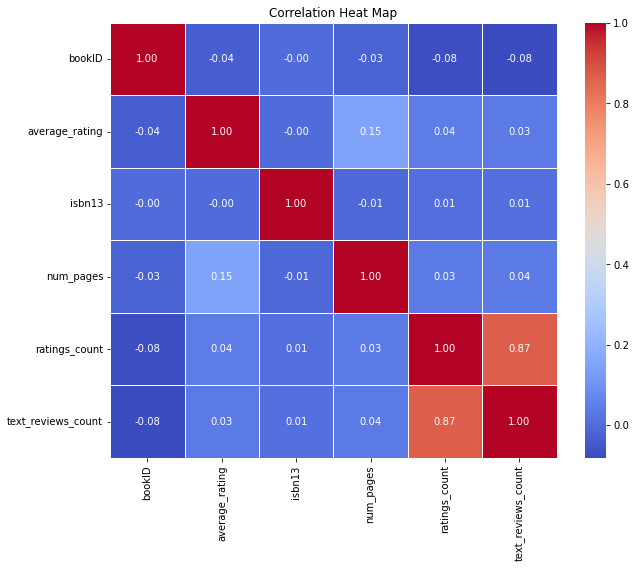

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heat Map')
plt.show()

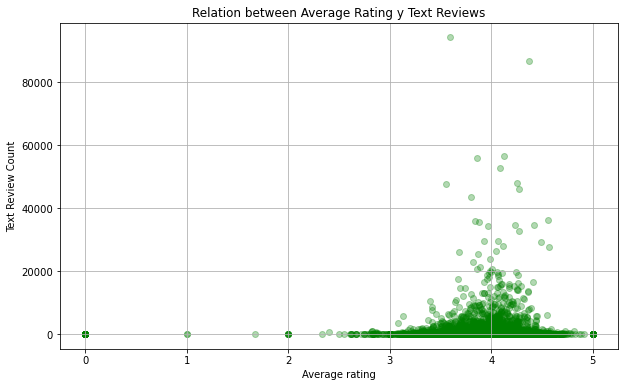

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(data['average_rating'], data['text_reviews_count'], alpha=0.3, color='green')
plt.title('Relation between Average Rating y Text Reviews')
plt.xlabel('Average rating')
plt.ylabel('Text Review Count')
plt.grid(True)
plt.show()

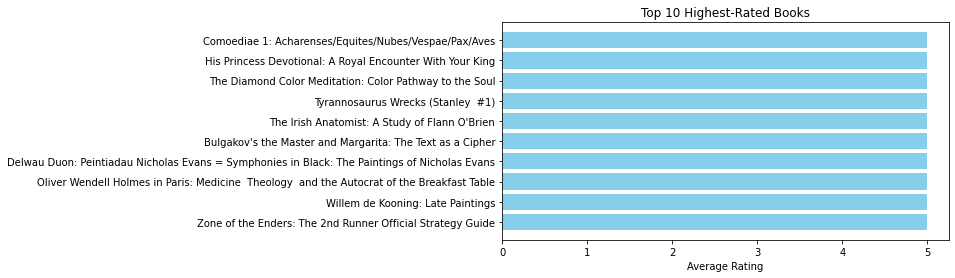

In [31]:
# Sorting the DataFrame by 'average_rating' in descending order
highest_rated_books = data.sort_values(by='average_rating', ascending=False)

# Selecting the top N highest-rated books (e.g., top 10)
top_n = 10
top_rated_books = highest_rated_books.head(top_n)

# Creating a bar chart
plt.figure(figsize=(8, 4))
plt.barh(top_rated_books['title'], top_rated_books['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 10 Highest-Rated Books')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest-rated book on top
plt.show()




In [ ]:
# above, we have the top 10 highest rated titles.

In [33]:
# Top 15 authors with best ratings

authors_avg_ratings = data.groupby('authors')['average_rating'].mean()
authors_avg_ratings = authors_avg_ratings.sort_values(ascending=False)
top_authors = authors_avg_ratings.head(15)
print(top_authors)

# below, you can see the best rated authors with perfect score, and a visualization of it in a bar graphic

authors
Keith Donohue                                           5.0
John  Diamond                                           5.0
R. McL. Wilson                                          5.0
Nicholas    Evans/Rhonda  Evans                         5.0
James E. Campbell                                       5.0
Aristophanes/F.W. Hall/W.M. Geldart                     5.0
Chris    Green/Chris Wright/Paul Douglas Gardner        5.0
Sheri Rose Shepherd                                     5.0
Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner    5.0
Todd Davis/Marc Frey                                    5.0
Ian        Martin/Katie Elliott                         5.0
Elena N. Mahlow                                         5.0
William C. Dowling                                      5.0
Dennis Adler/R.L. Wilson                                5.0
Middlesex Borough Heritage Committee                    5.0
Name: average_rating, dtype: float64


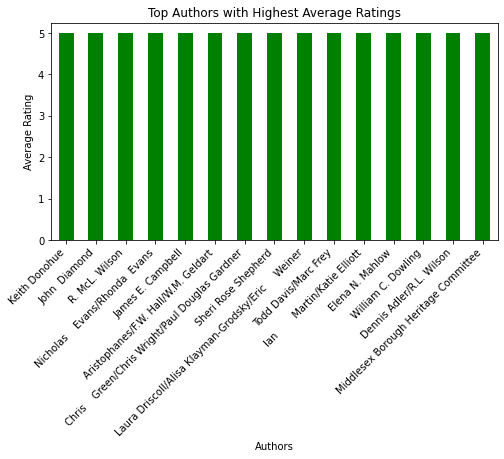

In [34]:
plt.figure(figsize=(8, 4))
top_authors.plot(kind='bar', color='green')
plt.title('Top Authors with Highest Average Ratings')
plt.xlabel('Authors')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
# Sorting authors based on average rating in ascending order
authors_avg_ratings = authors_avg_ratings.sort_values(ascending=True)
bottom_authors = authors_avg_ratings.head(15)

print("Authors with the Lowest Average Ratings:")
print(bottom_authors)

Authors with the Lowest Average Ratings:
authors
Graham Handley                                                                                                                                   0.0
Georg Wilhelm Friedrich Hegel/Michael John Petry                                                                                                 0.0
Better Homes and Gardens                                                                                                                         0.0
John Weld/Phil Interlandi                                                                                                                        0.0
Open City Magazine/James Purdy/Daniel Pinchbeck/Michael Cunningham/Deborah Garrison/Rem Koolhaas/Rick Moody/Strawberry Saroyan/Debra Garrison    0.0
Doug Walsh                                                                                                                                       0.0
Robert A. Weiss/Margaret A. Weiss/Karen L. Beasley       

In [ ]:
# and we also have plenty of authors that have been rated with 0 score. That could mean an absence of rate, anyway.

In [36]:
rating_counts = data['average_rating'].value_counts()
sorted_ratings = rating_counts.sort_index()
print(sorted_ratings)

0.00    25
1.00     2
1.67     1
2.00     6
2.33     1
        ..
4.83     1
4.86     1
4.88     1
4.91     1
5.00    22
Name: average_rating, Length: 209, dtype: int64


In [118]:
# Round the 'average_rating' column to the nearest integer
data['rounded_rating'] = data['average_rating'].round().astype(int)

# Count the number of books for each rounded rating
rating_counts = data['rounded_rating'].value_counts()

# Calculate the total number of books
total_books = len(data)

# Sort the ratings in descending order
sorted_ratings = rating_counts.sort_index(ascending=False)

# Displaying the count and percentage of books for each rating
for rating, count in sorted_ratings.items():
    percentage = (count / total_books) * 100
    print(f"Ranked with {rating}: {count} books ({percentage:.2f}%)")

Ranked with 5: 189 books (1.70%)
Ranked with 4: 10201 books (91.71%)
Ranked with 3: 696 books (6.26%)
Ranked with 2: 10 books (0.09%)
Ranked with 1: 2 books (0.02%)
Ranked with 0: 25 books (0.22%)


In [ ]:
# The output above indicates the number of books that have received each rating, and a bar graph of it. Almost 92% with a rating of 4!

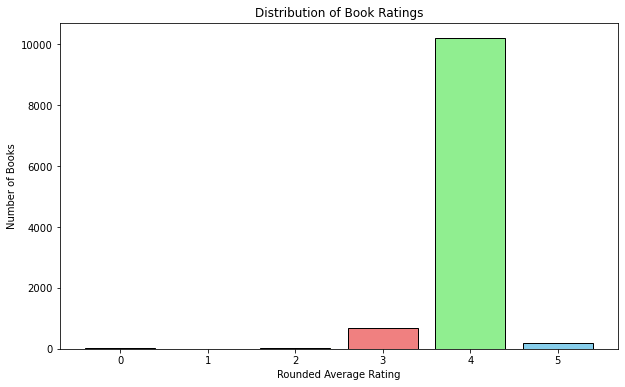

In [38]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightsalmon']
plt.figure(figsize=(10, 6))
plt.bar(sorted_ratings.index, sorted_ratings.values, color=colors, edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rounded Average Rating')
plt.ylabel('Number of Books')
plt.xticks(sorted_ratings.index)
plt.show()

In [42]:
numerical_columns = list(data.select_dtypes(include=[np.number]))
print(numerical_columns)

['bookID', 'average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count', 'rounded_rating']


In [45]:
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)

21827.0
0.36999999999999966
526754242.0
224.0
4896.5
229.0
0.0


In [59]:
# Create a copy of the original dataset
data_no_outliers = data.copy()

# Identify and remove outliers
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_indices = data[col].index[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Reset the index of the copied dataset
    data_no_outliers = data_no_outliers.reset_index(drop=True)
    
    # Remove outliers from the copied dataset
    data_no_outliers = data_no_outliers.drop(outlier_indices.intersection(data_no_outliers.index))

# Print the shape of the new dataset without outliers
print("Shape of the dataset without outliers:", data_no_outliers.shape)


Shape of the dataset without outliers: (6102, 14)


In [60]:
from scipy.stats import zscore

In [62]:
z_scores = zscore(data[numerical_columns])

# Identify outliers based on z-scores
outlier_indices = (np.abs(z_scores) > 3).any(axis=1)
print(outlier_indices)

0         True
1         True
2        False
3         True
4         True
         ...  
11118    False
11119    False
11120    False
11121    False
11122    False
Length: 11123, dtype: bool


In [63]:
# Create a copy of the original dataset
data_no_outliers_zscore = data[~outlier_indices]

# Print the shape of the new dataset without outliers
print("Shape of the dataset without outliers (Z-Score):", data_no_outliers_zscore.shape)

Shape of the dataset without outliers (Z-Score): (10551, 14)


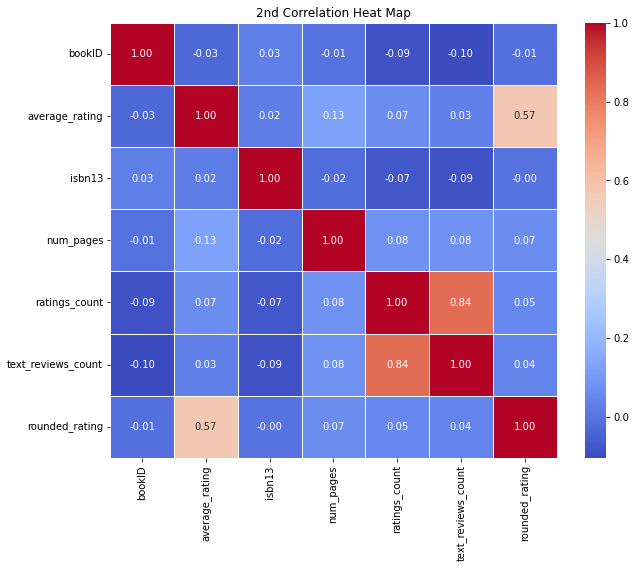

In [72]:
# Crear un mapa de calor de la matriz de correlación
matrix_corr2 = data_no_outliers_zscore.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('2nd Correlation Heat Map')
plt.show()
